In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Graphs

In [3]:
df_05 = pd.read_csv('/home/otabek.nazarov/Downloads/thesis/ifcc/metric_experiments_0.05.csv')
df_15 = pd.read_csv('/home/otabek.nazarov/Downloads/thesis/ifcc/metric_experiments_0.15.csv')
df_20 = pd.read_csv('/home/otabek.nazarov/Downloads/thesis/ifcc/metric_experiments_0.2.csv')
df_25 = pd.read_csv('/home/otabek.nazarov/Downloads/thesis/ifcc/metric_experiments_0.25.csv')
df_30 = pd.read_csv('/home/otabek.nazarov/Downloads/thesis/ifcc/metric_experiments_0.3.csv')

In [4]:
f1_05 = pd.read_csv('/home/otabek.nazarov/Downloads/thesis/CheXbert/src/metrics_results_0.05.csv')
f1_15 = pd.read_csv('/home/otabek.nazarov/Downloads/thesis/CheXbert/src/metrics_results_0.15.csv')
f1_20 = pd.read_csv('/home/otabek.nazarov/Downloads/thesis/CheXbert/src/metrics_results_0.2.csv')
f1_25 = pd.read_csv('/home/otabek.nazarov/Downloads/thesis/CheXbert/src/metrics_results_0.25.csv')
f1_30 = pd.read_csv('/home/otabek.nazarov/Downloads/thesis/CheXbert/src/metrics_results_0.3.csv')

/apps/local/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/apps/local/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/apps/local/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


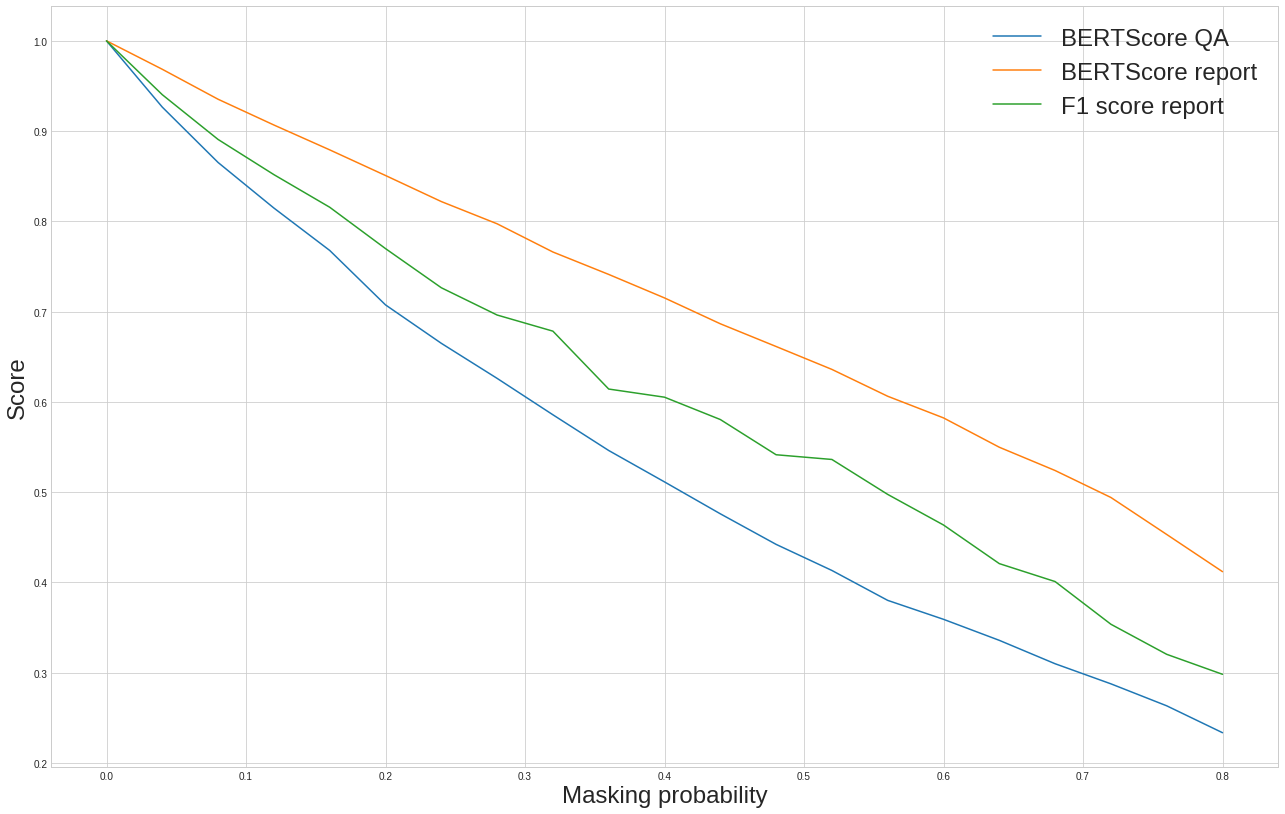

In [24]:
# Initialise the subplot function using number of rows and columns
idx = -4
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (22, 14)
figure, axis = plt.subplots(1, 1)
# figure.suptitle('QABERTScore Analysis', fontsize=25)

axis.plot(df_20['mask_prob'][:idx], df_20['f1_qa'][:idx], label = "BERTScore QA")
axis.plot(df_20['mask_prob'][:idx], df_20['f1_full'][:idx], label = "BERTScore report")
axis.plot(df_20['mask_prob'][:idx], f1_20['f1_macro'][:idx], label = "F1 score report")
axis.set_xlabel('Masking probability', fontsize=24)
axis.set_ylabel('Score', fontsize=24)
axis.legend(prop={'size': 24})

# axis[0].plot(df_20['mask_prob'][:idx], df_20['f1_qa'][:idx], label = "BERTScore QA")
# axis[0].plot(df_20['mask_prob'][:idx], df_20['f1_full'][:idx], label = "BERTScore report")
# axis[0].plot(df_20['mask_prob'][:idx], f1_20['f1_macro'][:idx], label = "F1 score report")
# axis[0].set_xlabel('Masking probability', fontsize=16)
# axis[0].set_ylabel('Score', fontsize=16)
# axis[0].legend(prop={'size': 16})

# axis[1].plot(df_30['mask_prob'][:idx], df_05['f1_qa'][:idx], label = "QA threshold 0.05")
# axis[1].plot(df_30['mask_prob'][:idx], df_15['f1_qa'][:idx], label = "QA threshold 0.15")
# # axis.plot(df_30['mask_prob'][:idx], df_20['f1_qa'][:idx], label = "QA threshold 0.20")
# # axis.plot(df_30['mask_prob'][:idx], df_25['f1_qa'][:idx], label = "QA threshold 0.25")
# axis[1].plot(df_30['mask_prob'][:idx], df_30['f1_qa'][:idx], label = "QA threshold 0.30")
# axis[1].set_xlabel('Masking probability', fontsize=16)
# axis[1].set_ylabel('QA BERTScore', fontsize=16)
# axis[1].legend(prop={'size': 16})

/apps/local/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/apps/local/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/apps/local/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


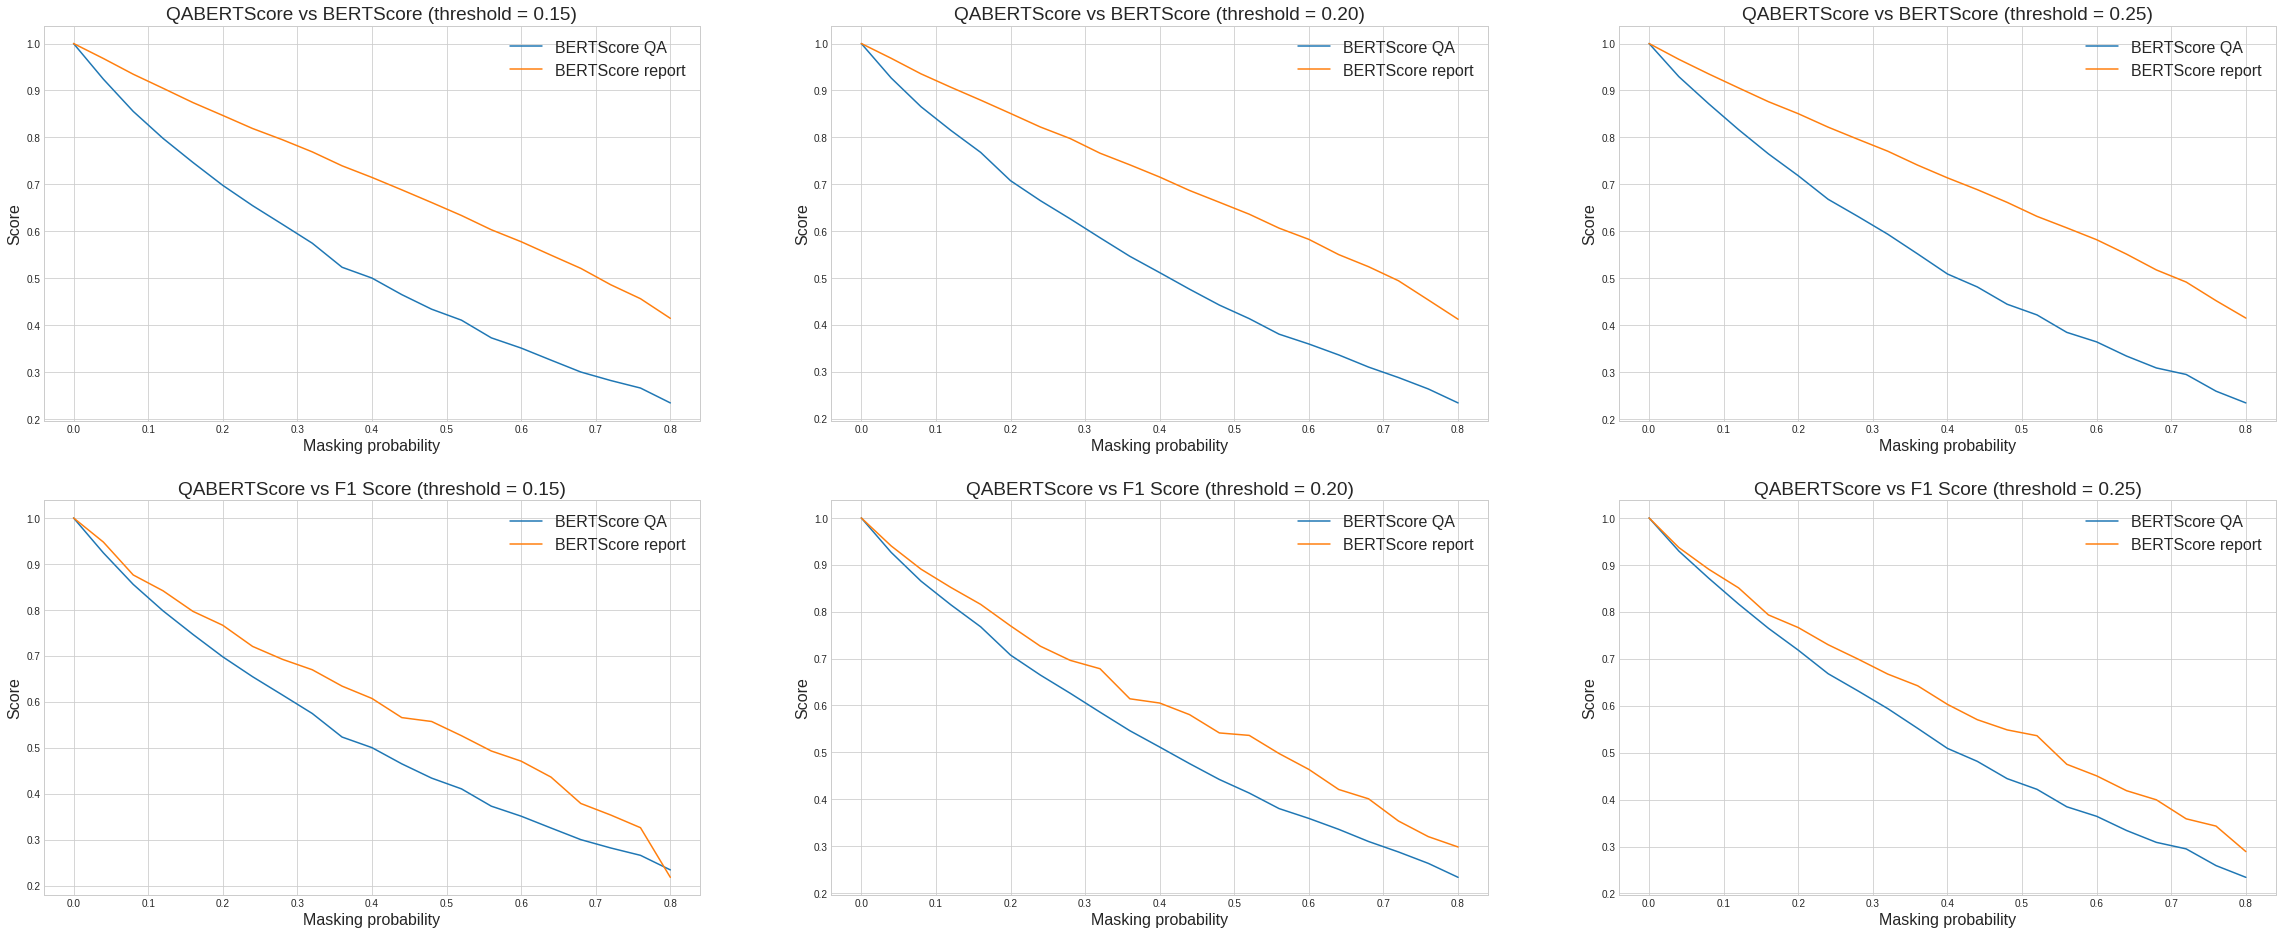

In [52]:
idx = -4
qa_list = [df_15, df_20, df_25]
f1_list = [f1_15, f1_20, f1_25]
thresholds = [0.15, 0.20, 0.25]

cols = 3
rows = 2

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(rows, cols, figsize=(40, 16))
# fig.suptitle('QABERTScore Analysis', fontsize=28)


for row in range(rows):
    for col in range(cols):
        cur_df = qa_list[col]
        cur_f1 = f1_list[col]
        col_name = 'f1_full' if row == 0 else 'f1_macro'
        graph_df = cur_df if row == 0 else cur_f1
        title_name = 'BERTScore' if row == 0 else 'F1 Score'
        
        ax[row,col].set_title(f"QABERTScore vs {title_name} (threshold = {thresholds[col]:.2f})", fontsize=19)
        ax[row,col].plot(cur_df['mask_prob'][:idx], cur_df['f1_qa'][:idx], label = "BERTScore QA")
        ax[row,col].plot(cur_df['mask_prob'][:idx], graph_df[col_name][:idx], label = "BERTScore report")
        ax[row,col].set_xlabel('Masking probability', fontsize=16)
        ax[row,col].set_ylabel('Score', fontsize=16)
        ax[row,col].legend(prop={'size': 16})

/apps/local/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/apps/local/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/apps/local/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


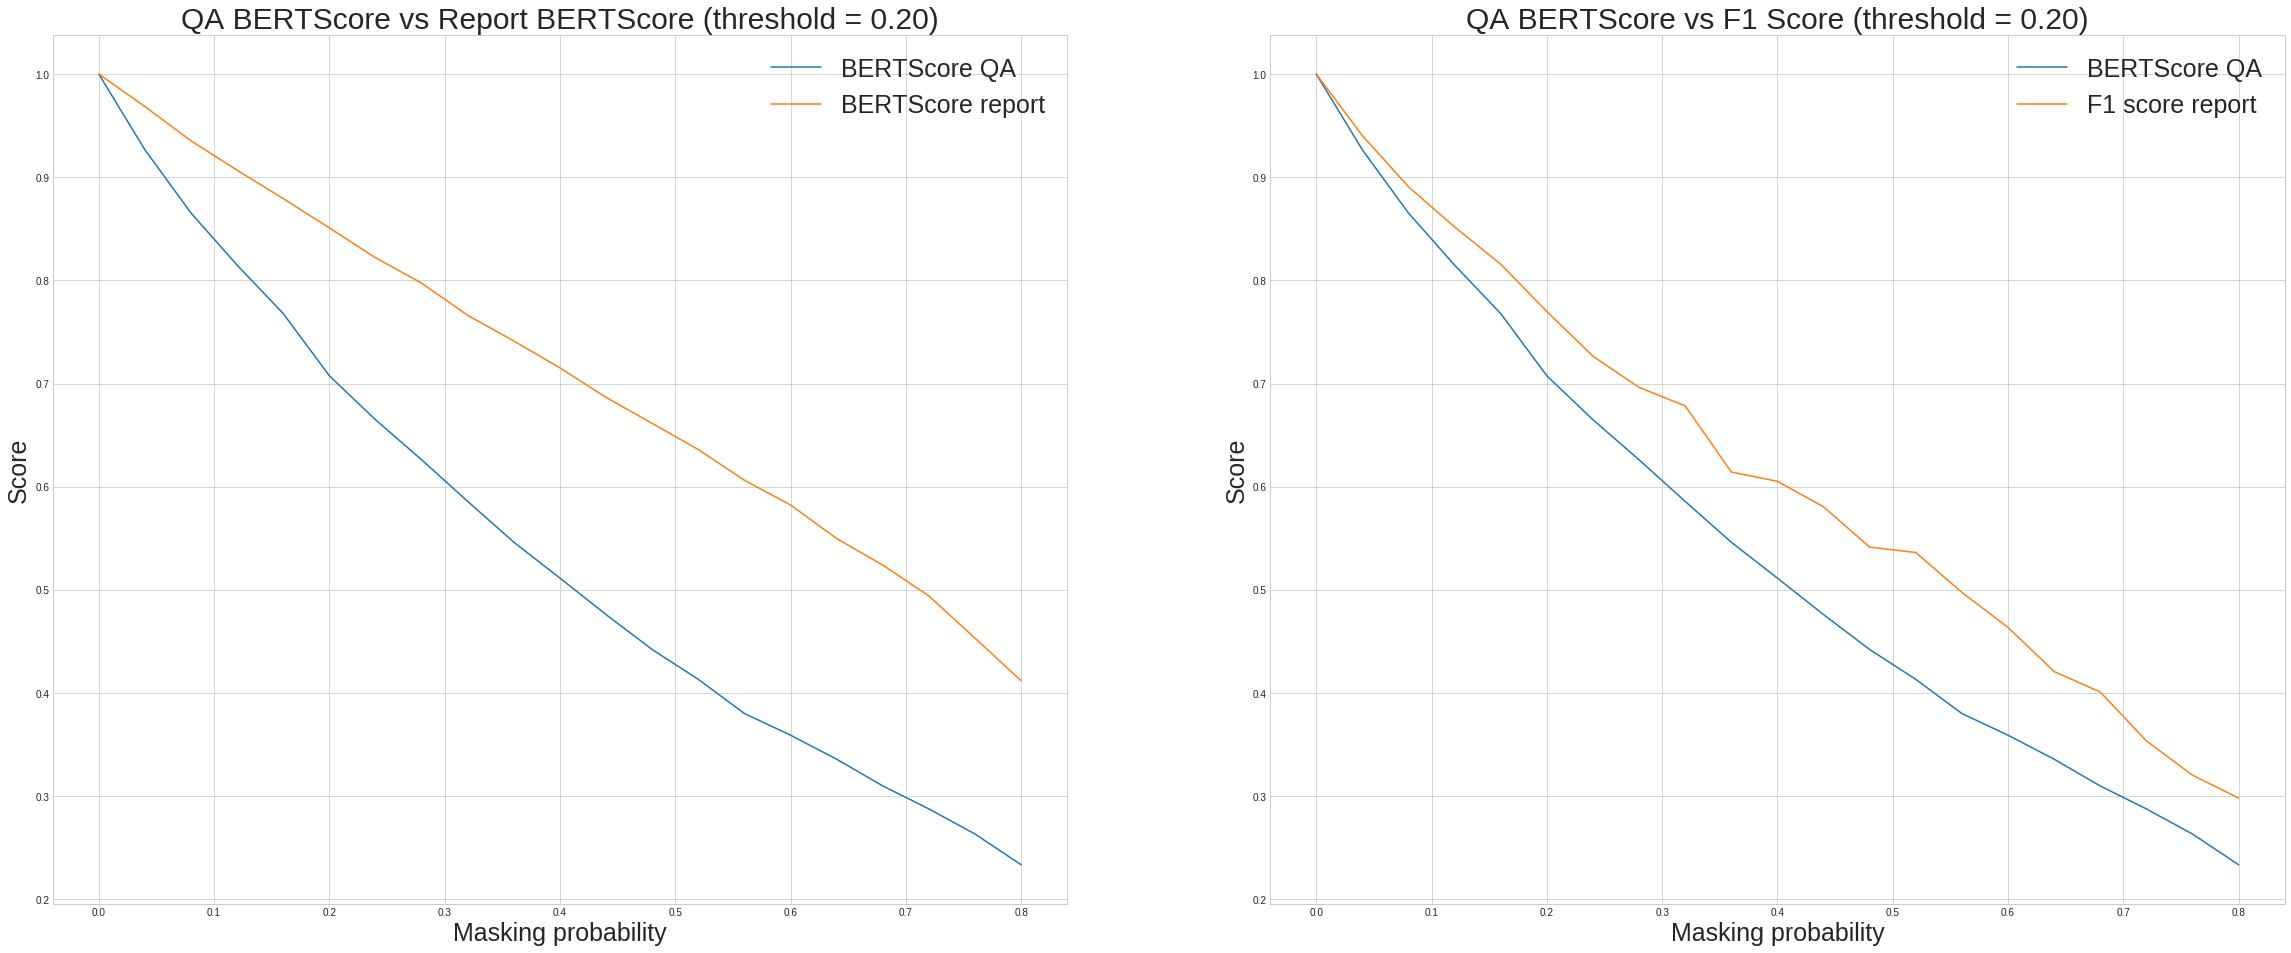

In [57]:
idx = -4
qa_list = [df_15, df_20, df_25]
f1_list = [f1_15, f1_20, f1_25]
thresholds = [0.15, 0.20, 0.25]

cols = 2
rows = 1

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(rows, cols, figsize=(40, 16))


ax[0].set_title(f"QA BERTScore vs Report BERTScore (threshold = 0.20)", fontsize=30)
ax[0].plot(df_20['mask_prob'][:idx], df_20['f1_qa'][:idx], label = "BERTScore QA")
ax[0].plot(df_20['mask_prob'][:idx], df_20['f1_full'][:idx], label = "BERTScore report")
ax[0].set_xlabel('Masking probability', fontsize=25)
ax[0].set_ylabel('Score', fontsize=25)
ax[0].legend(prop={'size': 25})


ax[1].set_title(f"QA BERTScore vs F1 Score (threshold = 0.20)", fontsize=30)
ax[1].plot(df_20['mask_prob'][:idx], df_20['f1_qa'][:idx], label = "BERTScore QA")
ax[1].plot(df_20['mask_prob'][:idx], f1_20['f1_macro'][:idx], label = "F1 score report")
ax[1].set_xlabel('Masking probability', fontsize=25)
ax[1].set_ylabel('Score', fontsize=25)
ax[1].legend(prop={'size': 25})

# Class based F1 scores

In [10]:
from scipy.stats import kendalltau
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

In [11]:
qa_df_20 = pd.read_csv('/home/otabek.nazarov/Downloads/thesis/ifcc/qa_bert_scores_heart_0.2.csv')
qa_df_25 = pd.read_csv('/home/otabek.nazarov/Downloads/thesis/ifcc/qa_bert_scores_heart_0.25.csv')
qa_df_30 = pd.read_csv('/home/otabek.nazarov/Downloads/thesis/ifcc/qa_bert_scores_heart_0.3.csv')
chexbert_df = pd.read_csv('/home/otabek.nazarov/Downloads/thesis/x-ray-report-generation/saved/trans_baseline_labeled.csv').iloc[:3800]
chexbert_gt_df = pd.read_csv('/home/otabek.nazarov/Downloads/thesis/ifcc/labeled_reports_test.csv').iloc[:3800]

In [12]:
qa_df_30.columns

Index(['Is there pneumonia?', 'Is there edema?', 'Is there thorax?',
       'Are there devices?', 'Is there opacity?', 'Is there atelectasis?',
       'Is there cardiomegaly?', 'Is there lung lesion?',
       'Is there consolidation?', 'Is there fracture?'],
      dtype='object')

In [13]:
chexbert_df.columns

Index(['Report Impression', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia',
       'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
       'Fracture', 'Support Devices', 'No Finding'],
      dtype='object')

In [14]:
qa_questions_set = [
    'Is there pneumonia?',
    'Is there cardiomegaly?',
    'Is there consolidation?',
    'Is there opacity?',
    'Is there thorax?',
    'Is there atelectasis?'
]

chexbert_columns_set = [
    'Pneumonia',
    'Cardiomegaly',
    'Consolidation',
    'Lung Opacity',
    'Pneumothorax',
    'Atelectasis'
]

In [15]:
def softmax(x, temperature=1):
    return np.exp(x/temperature)/sum(np.exp(x/temperature))

def get_scores(gt_array, gen_array, qa_array, mode=None):

    # gt_array = np.where(gt_array == -1, 0, gt_array)
    gt_array = np.nan_to_num(gt_array, nan=0)

    # gen_array = np.where(gen_array == -1, 0, gen_array)
    gen_array = np.nan_to_num(gen_array, nan=0)
    f1 = f1_score(gt_array, gen_array, average=mode)

    qa_score = np.nanmean(qa_array)
    # qa_score = np.nan_to_num(qa_array, nan=0).mean()
    # nan_count = np.isnan(qa_array).sum()
    # qa_score = qa_score * (nan_count/3500)
    return f1[2], qa_score

In [16]:
def get_kendall_tau(chex_array, qa_array):
    chex_array = np.where(chex_array == -1, 1, chex_array)
    chex_array = np.nan_to_num(chex_array, nan=0)
    qa_array = np.nan_to_num(qa_array, nan=0)
    return kendalltau(chex_array, qa_array)

In [17]:
chex_scores = []
qa_scores_25 = []
qa_scores_20 = []
qa_scores_30 = []
for chex_col, cur_qa in zip(chexbert_columns_set, qa_questions_set):
    chex, qa_20 = get_scores(chexbert_gt_df[chex_col].values, chexbert_df[chex_col].values, qa_df_20[cur_qa].values)
    chex, qa_25 = get_scores(chexbert_gt_df[chex_col].values, chexbert_df[chex_col].values, qa_df_25[cur_qa].values)
    chex, qa_30 = get_scores(chexbert_gt_df[chex_col].values, chexbert_df[chex_col].values, qa_df_30[cur_qa].values)
    
    chex_scores.append(chex)
    qa_scores_20.append(qa_20)
    qa_scores_25.append(qa_25)
    qa_scores_30.append(qa_30)

qa_scores_20 = softmax(np.array(qa_scores_20), temperature=0.3)
qa_scores_25 = softmax(np.array(qa_scores_25), temperature=0.3)
qa_scores_30 = softmax(np.array(qa_scores_30), temperature=0.3)

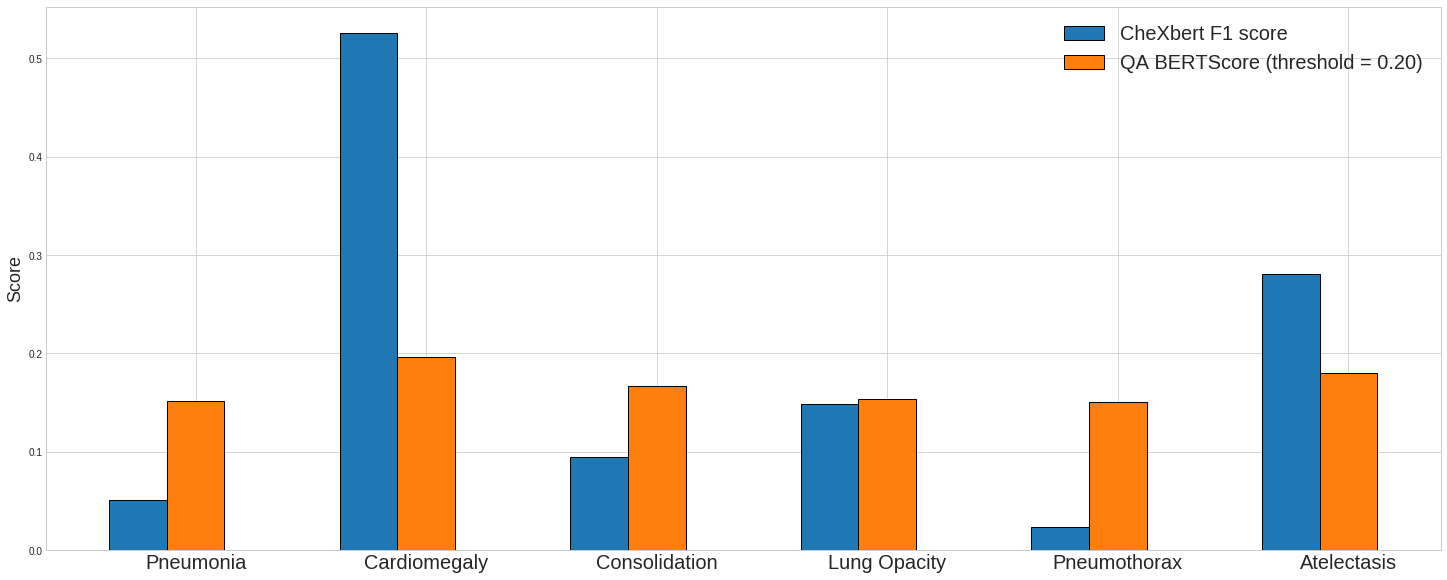

In [23]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(25, 10))
# plt.suptitle('QA BERTScore and Classification F1 Score Comparison', fontsize=20)
 
# Set position of bar on X axis
br1 = np.arange(len(chex_scores))
br2 = [x + barWidth for x in br1]
# br3 = [x + barWidth for x in br2]
# br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, chex_scores, width = barWidth,
        edgecolor ='black', label ='CheXbert F1 score')
plt.bar(br2, qa_scores_20, width = barWidth,
        edgecolor ='black', label ='QA BERTScore (threshold = 0.20)')       
# plt.bar(br3, qa_scores_25, width = barWidth,
#         edgecolor ='black', label ='QA BERTScore (threshold = 0.25)')
# plt.bar(br4, qa_scores_30, width = barWidth,
#         edgecolor ='black', label ='QA BERTScore (threshold = 0.30)')
 
# Adding Xticks
# plt.xlabel('Diseases', fontsize = 18)
plt.ylabel('Score', fontsize = 18)
plt.xticks([r + barWidth for r in range(len(chex_scores))],
        ['Pneumonia', 'Cardiomegaly', 'Consolidation', 'Lung Opacity', 'Pneumothorax', 'Atelectasis'],
        fontsize=20)
 
plt.legend(prop={'size': 20})
plt.show()

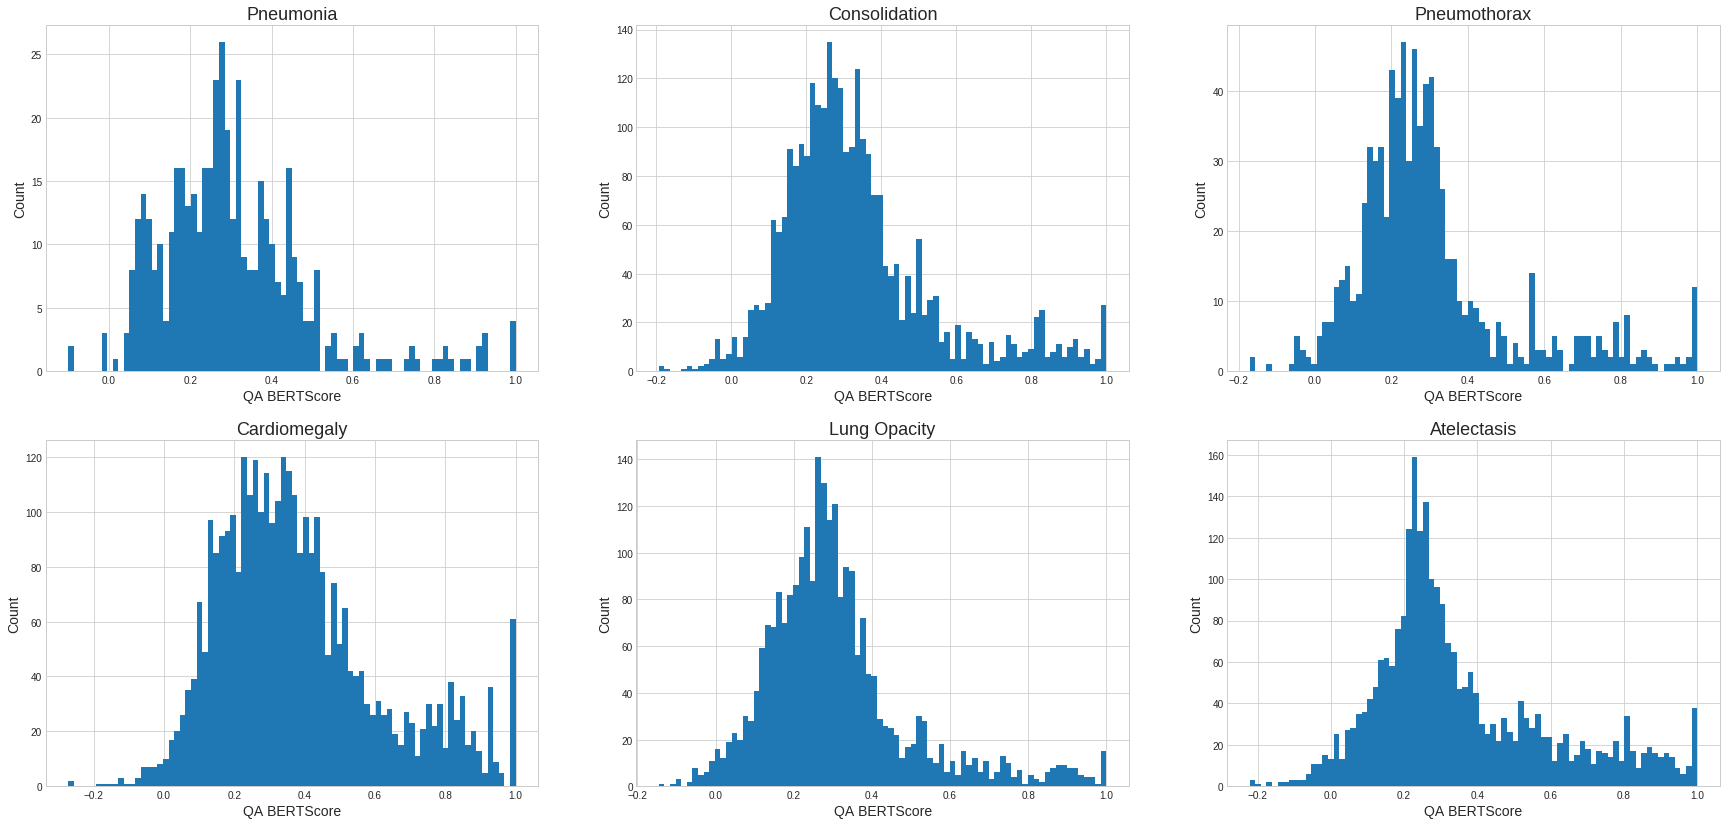

In [23]:
cols = 3
rows = 2

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(rows, cols, figsize =(30, 14))
# fig.suptitle('Histograms of QABERTScores for Different Classes', fontsize=28)
idx = 0
for col in range(cols):
    for row in range(rows):
        qa = qa_questions_set[idx]
        ax[row,col].hist(qa_df_20[qa].values, bins=80)
        ax[row,col].set_title(chexbert_columns_set[idx], fontsize=18) 
        ax[row,col].set_xlabel('QA BERTScore', fontsize=14)
        ax[row,col].set_ylabel('Count', fontsize=14)
        idx = idx + 1

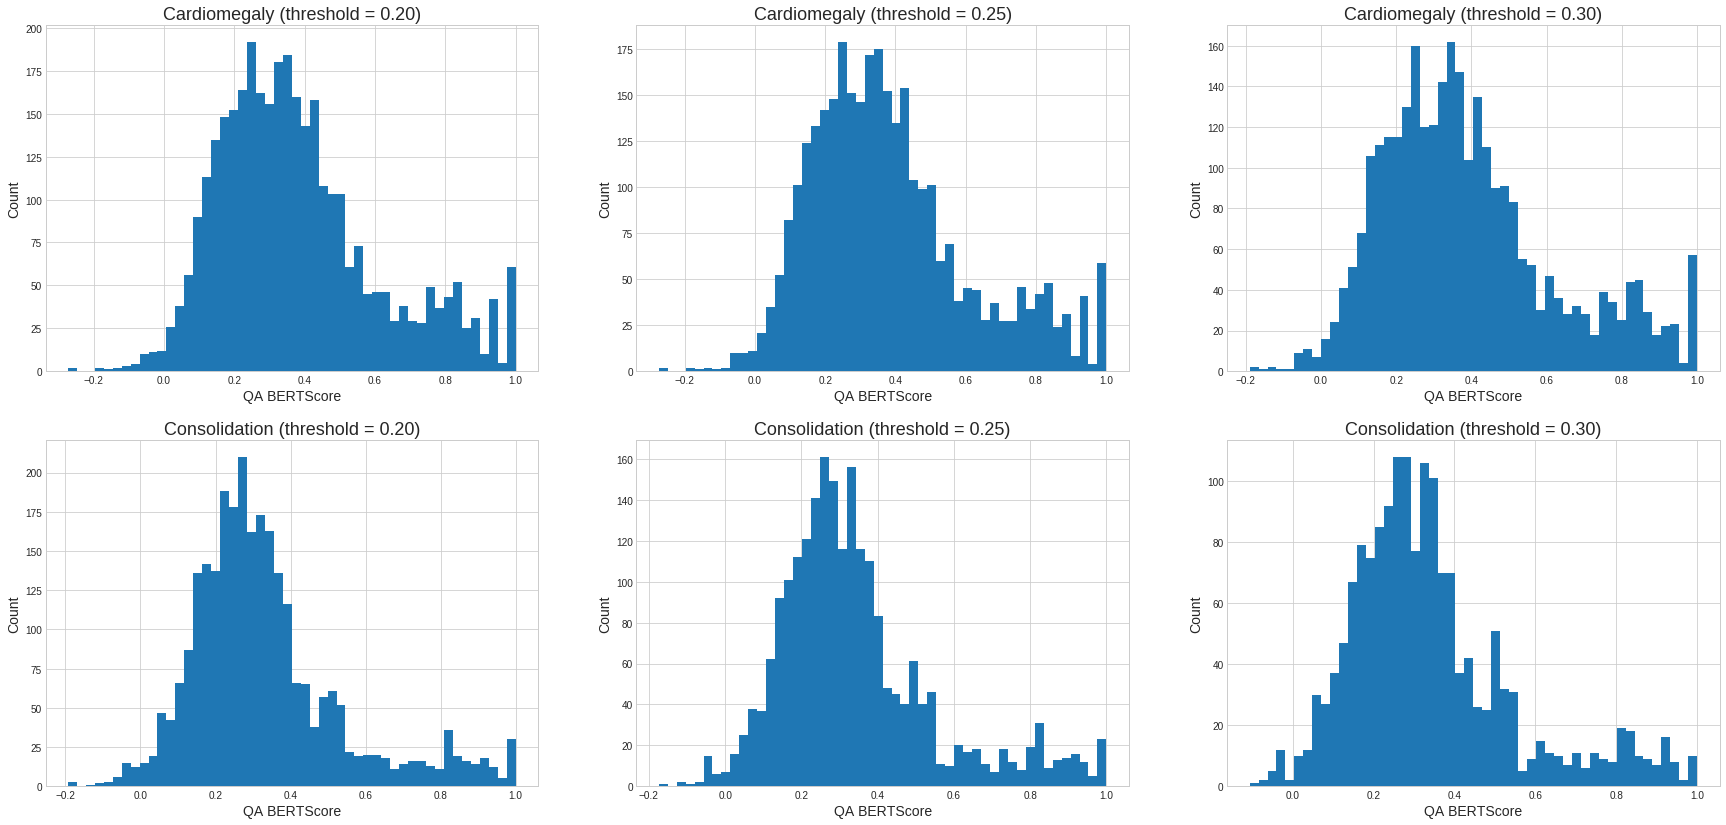

In [82]:
cols = 3
rows = 2

cur_diseases = ['Is there cardiomegaly?',
                'Is there consolidation?',
                'Is there opacity?',]
bar_names = ['Cardiomegaly', 'Consolidation', 'Opacity']
hist_dfs = [qa_df_20, qa_df_25, qa_df_30]
thresholds = [0.20, 0.25, 0.30]

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(rows, cols, figsize =(30, 14))

for col in range(cols):
    for row in range(rows):
        qa = qa_questions_set[col]
        cur_df = hist_dfs[col]
        ax[row,col].hist(cur_df[cur_diseases[row]].values, bins=50)
        ax[row,col].set_title(f'{bar_names[row]} (threshold = {thresholds[col]:.2f})', fontsize=18) 
        ax[row,col].set_xlabel('QA BERTScore', fontsize=14)
        ax[row,col].set_ylabel('Count', fontsize=14)

# Prepare report for metric check

In [2]:
import pandas as pd
import re

In [4]:
with open('/home/otabek.nazarov/Downloads/thesis/ifcc/out_bert_only/test_0-16008_samples.txt') as f:
    lines = f.readlines()

In [5]:
reports = []

for cur_line in lines:
    s = cur_line[54:]
    reports.append(' '.join(re.sub('\d', '', s).strip().split(' ')[1:]))

In [6]:
df = pd.DataFrame({'Report Impression' : reports})

In [7]:
df.head(5)

,Report Impression
0,frontal and lateral views of the chest were ob...
1,frontal and lateral views of the chest were ob...
2,the patient is status post median sternotomy a...
3,"in comparison with the study of ___ , there is..."
4,"in comparison with the study of ___ , there is..."


In [8]:
df.to_csv('trans_rl_bertonly_16000.csv', index=False)